Visualize embedding of instructions learned by text encoders
Ganesh 11/08/2023

In [12]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pickle

In [13]:
# get parameters
model_name = "One-hot"
save_fig_dir = "./figures/"
zero_shot = True
conceptlearning = False


if conceptlearning:
    train_embd_dir = r"C:\Users\linzj\Desktop\Model Analysis\lstm_activity\lstm_activity_fromS1_train.pkl"
    test_embd_dir = r"C:\Users\linzj\Desktop\Model Analysis\lstm_activity\lstm_activity_fromS1_test.pkl"
    pretrained = True
else:
    train_embd_dir = r"C:\Users\linzj\Desktop\Model Analysis\lstm_activity\lstm_activity_fromscratch_train.pkl"
    test_embd_dir = r"C:\Users\linzj\Desktop\Model Analysis\lstm_activity\lstm_activity_fromscratch_test.pkl"
    pretrained = False

training = "S1 & S2" if pretrained else "S2 only"
print(training)

figsize = (6,4)

S2 only


In [14]:
# import instructions & embeddings

def get_inst_emb(file_dir):
    with open(file_dir, 'rb') as f:
        x = pickle.load(f)
    return list(x.keys()), np.array([x[i] for i in x.keys()])


train_instructions, train_embeddings = get_inst_emb(train_embd_dir)
test_instructions, test_embeddings = get_inst_emb(test_embd_dir)

print(train_instructions)
print(train_embeddings.shape)
print(test_instructions)
print(test_embeddings.shape)

instructions = train_instructions + test_instructions
embeddings = np.concatenate([train_embeddings, test_embeddings],axis=0)
print(len(instructions))
print(embeddings.shape)


['red capsule prism', 'red capsule sphere', 'red cube cylinder', 'red cube prism', 'red cube sphere', 'red cylinder prism', 'red cylinder sphere', 'red prism sphere', 'green capsule cube', 'green capsule cylinder', 'green capsule prism', 'green capsule sphere', 'green cube sphere', 'green cylinder prism', 'green cylinder sphere', 'green prism sphere', 'blue capsule cube', 'blue capsule cylinder', 'blue capsule prism', 'blue capsule sphere', 'blue cube cylinder', 'blue cube prism', 'blue cube sphere', 'blue prism sphere', 'yellow capsule cube', 'yellow capsule cylinder', 'yellow capsule sphere', 'yellow cube cylinder', 'yellow cube prism', 'yellow cube sphere', 'yellow cylinder prism', 'yellow cylinder sphere', 'black capsule cube', 'black capsule cylinder', 'black capsule prism', 'black cube cylinder', 'black cube prism', 'black cylinder prism', 'black cylinder sphere', 'black prism sphere']
(40, 10, 100, 256)
['red capsule cube', 'red capsule cylinder', 'green cube cylinder', 'green c

In [15]:
# reshape LSTM embeddings

_,train_indices = np.meshgrid(np.arange(10),np.arange(40))
_,test_indices = np.meshgrid(np.arange(10),np.arange(10))

train_idx = np.reshape(train_indices,[400])
test_indices = np.reshape(test_indices,[100])
print(test_indices)

#step = 1
#tr_emb = train_embeddings[:,:,step,:]
tr_emb = np.mean(train_embeddings,axis=2)
tr_emb = np.reshape(tr_emb,[400,256])
print(tr_emb.shape)

#ts_emb = test_embeddings[:,:,step,:]
ts_emb = np.mean(test_embeddings,axis=2)
ts_emb = np.reshape(ts_emb,[100,256])

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7
 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9]
(400, 256)


(40, 10, 100, 256)
red capsule prism
green capsule prism
blue cube cylinder
[0.13820015 0.16550721 0.66352147 0.3712604  0.59586626 0.23297791
 0.19199595 0.15699281 0.43658102 0.661045   0.58412284 0.27188432
 0.10232223 0.66517353 0.3411855  0.6266133  0.10191721 0.45897615
 0.13666688 0.44804367 0.4239343  0.10217666 0.14377414 0.5604958
 0.12207315 0.515981   0.2528359  0.19627342 0.49054915 0.3933198
 0.14138083 0.10223    0.11124686 0.25959677 0.6231264  0.37254497
 0.33657292 0.2986786  0.13186564 0.6458456  0.42562386 0.30082107
 0.62748474 0.75151294 0.42820352 0.49691522 0.661078   0.23971082
 0.38075235 0.49466062 0.52454257 0.3782112  0.12779091 0.3523731
 0.11722682 0.10190764 0.15840243 0.5903957  0.5347911  0.4268874
 0.56625324 0.46469674 0.35467058 0.11048689 0.4823029  0.6408335
 0.63621134 0.5300256  0.27727365 0.48613736 0.11029809 0.5370538
 0.17585957 0.35224    0.46310636 0.3299101  0.18968692 0.22956993
 0.7013201  0.4483519  0.40374026 0.7912298  0.7793684  0.6

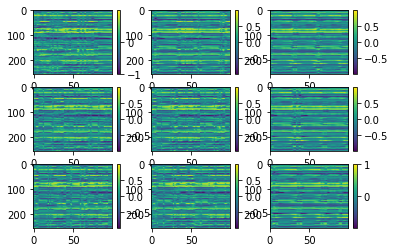

<Figure size 432x288 with 0 Axes>

In [16]:
# see example LSTM activity
print(train_embeddings.shape)
print(train_instructions[0])
print(train_instructions[10])
print(train_instructions[20])

#print(np.mean(train_embeddings[0,0],axis=0))
print(np.std(train_embeddings[0,0],axis=0))

f,ax = plt.subplots(ncols=3,nrows=3)
for i in range(3):
    im = ax[i,0].imshow(train_embeddings[0,i].T,aspect='auto')
    plt.colorbar(im, ax=ax[i,0])
    im = ax[i,1].imshow(train_embeddings[10,i].T,aspect='auto')
    plt.colorbar(im, ax=ax[i,1])
    im = ax[i,2].imshow(train_embeddings[20,i].T,aspect='auto')
    plt.colorbar(im, ax=ax[i,2])
plt.show()
plt.tight_layout()

In [17]:
# get word embedding using PCA

pca = PCA(n_components=0.9)  # get N components to get 95% variance

if zero_shot:
    emb = np.concatenate([tr_emb, ts_emb],axis=0)
    emb = pca.fit_transform(emb)

    train_emb = emb[:400]
    test_emb = emb[400:]
    print(train_emb.shape)
    print(test_emb.shape)
    expvar = np.round(pca.explained_variance_ratio_,3)
    print(expvar)
    
    # pca_var_file = f"{save_fig_dir}{model_name}_{training}_PCA_zeroshot.txt"
    # with open(pca_var_file, 'w') as file:
    #     file.write(str(pca.explained_variance_ratio_))

else:

    # fit the principal components using only the train embeddings & transform them
    train_emb = pca.fit_transform(tr_emb)

    # get number of components & variance explained by each
    print(train_emb.shape)
    print(np.round(pca.explained_variance_ratio_,3))

    # transform the test embeddings using the components learned using train embeddings
    test_emb = pca.transform(ts_emb)
    print(test_emb.shape)

    # pca_var_file = f"{save_fig_dir}{model_name}_{training}_PCA.txt"
    # with open(pca_var_file, 'w') as file:
    #     file.write(str(pca.explained_variance_ratio_))


(400, 3)
(100, 3)
[0.782 0.111 0.031]


In [18]:
# reshape LSTM activity
train_idx_reverse = train_idx.reshape([40,10])
train_emb_reverse = train_emb.reshape([40,10,train_emb.shape[1]])
#print(train_idx_reverse)
print(train_emb_reverse.shape)

test_emb_reverse = test_emb.reshape([10,10,test_emb.shape[1]])
print(test_emb_reverse.shape)


(40, 10, 3)
(10, 10, 3)


In [19]:
# get color map
# N = 50
# def get_cmap(n, name='hsv'):
#     '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
#     RGB color; the keyword argument name must be a standard mpl colormap name.'''
#     return plt.cm.get_cmap(name, n)

# cmap = get_cmap(N)


name_rules = {
    "cube cylinder": "s",
    "cube prism": "x",
    "cube sphere": "o",

    "capsule cube": "P",
    "capsule cylinder": "+",
    "capsule prism": "<",
    "capsule sphere": "*",

    "cylinder prism": ">",
    "cylinder sphere": "d",
    
    "prism sphere": "^",
    # Add more rules as needed
}

def get_colormap_symbolmap(instructions):
    colormap = []
    shapemap = []
    for inst in instructions:
        color = inst.split(' ')[0]

        shape1 = inst.split(' ')[1]
        shape2 = inst.split(' ')[2]
        shape = shape1 + ' ' + shape2

        colormap.append(color)
        shapemap.append(shape)
    symbolmap = [name_rules[name] if name in name_rules else name for name in shapemap]
    return colormap,symbolmap

train_colormap, train_symbolmap = get_colormap_symbolmap(train_instructions)
test_colormap,test_symbolmap = get_colormap_symbolmap(test_instructions)
print(train_symbolmap)
print(test_symbolmap)


['<', '*', 's', 'x', 'o', '>', 'd', '^', 'P', '+', '<', '*', 'o', '>', 'd', '^', 'P', '+', '<', '*', 's', 'x', 'o', '^', 'P', '+', '*', 's', 'x', 'o', '>', 'd', 'P', '+', '<', 's', 'x', '>', 'd', '^']
['P', '+', 's', 'x', '>', 'd', '^', '<', '*', 'o']


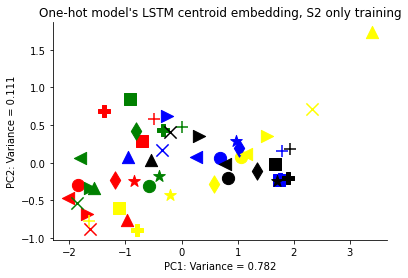

In [20]:
# plot train embeddings using colormap

f = plt.figure(figsize=figsize)
plt.title(f"{model_name} model's LSTM centroid embedding, {training} training")
plt.xlabel("PC1: Variance = {:.3f}".format(expvar[0]))
plt.ylabel("PC2: Variance = {:.3f}".format(expvar[1]))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


for c, inst, emb in zip(np.arange(len(train_instructions)), train_instructions, train_emb_reverse):
    centroid = []
    for e in range(10):
        x1 = emb[e,1]
        x2 = emb[e,2]
        #plt.scatter(x1, x2, marker=train_symbolmap[c], color=train_colormap[c],s=100)
        centroid.append([x1,x2])

    centroid = np.mean(np.array(centroid),axis=0)
    x1 = centroid[0]
    x2 = centroid[1]
    plt.scatter(x1, x2, marker=train_symbolmap[c], color=train_colormap[c],s=150)

        #plt.text(x1,x2,s=inst, fontsize=8)

# plot test embeddings using colormap
for c, inst, emb in zip(np.arange(len(test_instructions)), test_instructions, test_emb_reverse):
    centroid = []
    for e in range(10):
        x1 = emb[e,1]
        x2 = emb[e,2]
        centroid.append([x1,x2])

    centroid = np.mean(np.array(centroid),axis=0)
    x1 = centroid[0]
    x2 = centroid[1]
    if zero_shot:
        plt.scatter(x1, x2, marker=test_symbolmap[c], color=test_colormap[c], s=150)
    else:
        plt.scatter(x1, x2, marker=test_symbolmap[c], color=test_colormap[c], facecolors="magenta", s=150)

        #plt.text(x1,x2,s=inst, fontsize=8, color="magenta")

plt.show()
# f.savefig(f"{save_fig_dir}{model_name}_LSTM_{training}_2D.png")


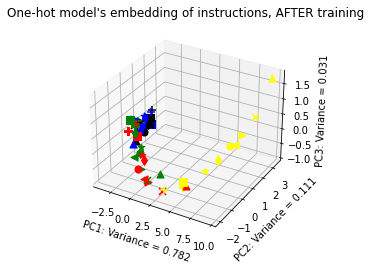

In [21]:
# plot 3D plots to cover 1 more axis
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

ax.set_title(f"{model_name} model's embedding of instructions, AFTER training")
ax.set_xlabel("PC1: Variance = {:.3f}".format(expvar[0]))
ax.set_ylabel("PC2: Variance = {:.3f}".format(expvar[1]))
ax.set_zlabel("PC3: Variance = {:.3f}".format(expvar[2]))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


for c, inst, emb in zip(np.arange(len(train_instructions)), train_instructions, train_emb_reverse):
    #print(emb)
    centroid = []
    for e in range(10):
        x1 = emb[e,0]
        x2 = emb[e,1]
        x3 = emb[e,2]
        centroid.append([x1,x2,x3])
    centroid = np.mean(np.array(centroid),axis=0)
    x1 = centroid[0]
    x2 = centroid[1]
    x3 = centroid[2]

    ax.scatter(x1, x2,x3, marker=train_symbolmap[c], color=train_colormap[c],s=50)
    #ax.text(x1,x2,x3, s=inst, fontsize=8)

# plot test embeddings using colormap
for c, inst, emb in zip(np.arange(len(test_instructions)), test_instructions, test_emb_reverse):
    centroid = []
    for e in range(10):
        x1 = emb[e,0]
        x2 = emb[e,1]
        x3 = emb[e,2]
        centroid.append([x1,x2,x3])
    centroid = np.mean(np.array(centroid),axis=0)
    x1 = centroid[0]
    x2 = centroid[1]
    x3 = centroid[2]
    
    ax.scatter(x1, x2,x3, marker=test_symbolmap[c], color=test_colormap[c],s=50)
    #ax.text(x1,x2,x3, s=inst, fontsize=8, color="magenta")

#ax.view_init(elev=40, azim=30)
plt.show()
# fig.savefig(f"{save_fig_dir}{model_name}_LSTM_{training}_3D.png")